In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
import pickle
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [22]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [23]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [24]:
X_train.shape

(34799, 32, 32, 3)

In [25]:
X_validation.shape

(4410, 32, 32, 3)

In [26]:
X_test.shape

(12630, 32, 32, 3)

In [27]:
y_train.shape

(34799,)

36

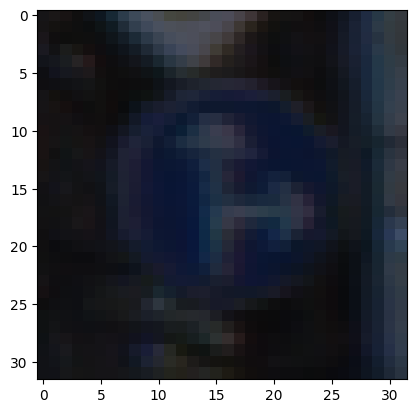

In [28]:
i = 1001
plt.imshow(X_train[i])
y_train[i]

In [29]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [30]:
X_train_grey = np.sum(X_train/3, axis=3, keepdims=True)
X_test_grey = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_grey = np.sum(X_validation/3, axis = 3, keepdims = True)

In [31]:
X_train_grey_norm = (X_train_grey - 128)/128
X_test_grey_norm = (X_test_grey - 128)/128
X_validation_grey_norm = (X_validation_grey -128)/128

In [32]:
X_train_grey.shape

(34799, 32, 32, 1)

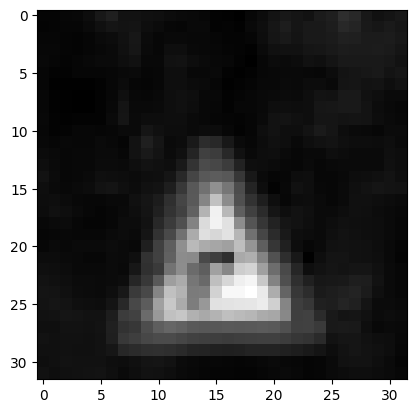

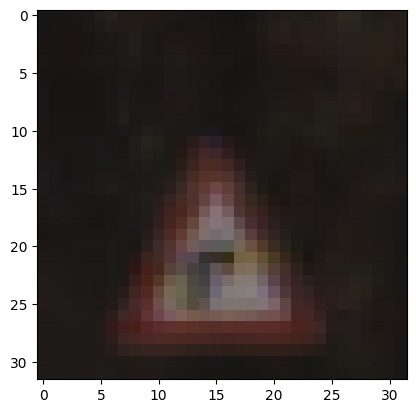

In [33]:
i = 610
plt.imshow(X_train_grey[i].squeeze(), cmap='grey')
plt.figure()
plt.imshow(X_train[i])

In [34]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers.legacy import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split

In [35]:
image_shape = X_train_grey[i].shape

In [36]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape = (32, 32, 1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation='relu'))



In [37]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(learning_rate=0.001), metrics = ['accuracy'])

In [38]:
history = cnn_model.fit(X_train_grey_norm,
                        y_train,
                        batch_size= 500,
                        epochs= 50,
                        verbose=1,
                        validation_data= (X_validation_grey_norm, y_validation))

Epoch 1/50
70/70 [==============================] - 6s 81ms/step - loss: 6.8192 - accuracy: 0.0685 - val_loss: 5.8148 - val_accuracy: 0.0517
Epoch 2/50
70/70 [==============================] - 6s 85ms/step - loss: 4.9290 - accuracy: 0.1031 - val_loss: 4.9967 - val_accuracy: 0.2120
Epoch 3/50
70/70 [==============================] - 5s 72ms/step - loss: 4.1124 - accuracy: 0.1458 - val_loss: 3.7612 - val_accuracy: 0.0068
Epoch 4/50
70/70 [==============================] - 5s 67ms/step - loss: 3.7612 - accuracy: 0.0052 - val_loss: 3.7612 - val_accuracy: 0.0068
Epoch 5/50
70/70 [==============================] - 4s 63ms/step - loss: 3.7612 - accuracy: 0.0052 - val_loss: 3.7612 - val_accuracy: 0.0068
Epoch 6/50
25/70 [=========>....................] - ETA: 3s - loss: 3.7612 - accuracy: 0.0042

KeyboardInterrupt: 